In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset_train=pd.read_csv('file:///C:/Users/RIKKI/Downloads/Recurrent_Neural_Networks/Google_Stock_Price_Train.csv')

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [14]:
training_set=dataset_train.iloc[:,1:2].values

In [15]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

### Feature Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
sc=MinMaxScaler(feature_range=(0,1))

In [18]:
training_set_scaled=sc.fit_transform(training_set)

In [19]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Create a data structure with 60 timesteps and 1 output --> Looks for past 60 days data to predict T+1 output

In [21]:
x_train=[]

In [22]:
y_train=[]

In [24]:
for i in range(60,1258):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
x_train,y_train=np.array(x_train) ,np.array(y_train)

In [35]:
x_train.shape

(1198, 60)

In [33]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [34]:
#Reshaping the data 

In [36]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [37]:
x_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [38]:
#Part2 - Building KNN 
#Importing the KERAS libraries and packages

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [40]:
#Initialize RNN
regressor =Sequential()

In [41]:
#Adding first LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
#Units is the number of LSTM cells in LSTM layer 
regressor.add(Dropout(0.2))  #20 percent of the neuron will be ignored during each iteration of training 

Instructions for updating:
Colocations handled automatically by placer.


In [42]:
#Adding second LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [43]:
#Adding 3rd LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

In [44]:
#Adding 4th LSTM layer and some dropout regularization
regressor.add(LSTM(units=50,return_sequences=False))
regressor.add(Dropout(0.2))

In [45]:
#Adding the Output layer

In [46]:
regressor.add(Dense(units=1 )) #As output layer has just 1 value to be calculated at T+1 time 

In [47]:
#Compiling RNN
regressor.compile(optimizer='adam',loss='mean_squared_error')  #RMS Prop or Adam optimizer is chosen one for ANN

In [48]:
#Fitting the RNN to the train set
regressor.fit(x_train,y_train,epochs=100,batch_size=32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0304
Epoch 2/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0067
Epoch 3/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0061
Epoch 4/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0060
Epoch 5/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 6/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0048
Epoch 7/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0050
Epoch 8/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 5s 5ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 5s 4ms/step - loss: 0.0016
Epoch 95/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 96/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 97/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 98/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 99/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0014
Epoch 100/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0012


In [49]:
#Part 3 
dataset_test=pd.read_csv('file:///C:/Users/RIKKI/Downloads/Recurrent_Neural_Networks/Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [51]:
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [52]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [55]:
#Getting the Predicted Stock prices

dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0) 
#vertical concat- axis =0 ,,,, horizontal concat, axis=1


In [56]:
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60:].values

In [60]:
inputs=inputs.reshape(-1,1)

In [59]:
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [61]:
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [62]:
inputs=sc.transform(inputs)

In [63]:
inputs

array([[0.9299055 ],
       [0.93113327],
       [0.92750577],
       [0.94415507],
       [0.93876032],
       [0.93403527],
       [0.93483518],
       [0.9313937 ],
       [0.94636878],
       [0.96569685],
       [0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.957

In [65]:
x_test=[]

In [66]:
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
    
x_test=np.array(x_test) 

In [67]:
x_test

array([[0.9299055 , 0.93113327, 0.92750577, ..., 0.95725128, 0.93796041,
        0.93688146],
       [0.93113327, 0.92750577, 0.94415507, ..., 0.93796041, 0.93688146,
        0.92955205],
       [0.92750577, 0.94415507, 0.93876032, ..., 0.93688146, 0.92955205,
        0.94731751],
       ...,
       [0.96054394, 0.9371419 , 0.92841729, ..., 1.01045465, 1.02407173,
        1.03930724],
       [0.9371419 , 0.92841729, 0.90804747, ..., 1.02407173, 1.03930724,
        1.03354044],
       [0.92841729, 0.90804747, 0.8771858 , ..., 1.03930724, 1.03354044,
        0.99624228]])

In [68]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [69]:
x_test

array([[[0.9299055 ],
        [0.93113327],
        [0.92750577],
        ...,
        [0.95725128],
        [0.93796041],
        [0.93688146]],

       [[0.93113327],
        [0.92750577],
        [0.94415507],
        ...,
        [0.93796041],
        [0.93688146],
        [0.92955205]],

       [[0.92750577],
        [0.94415507],
        [0.93876032],
        ...,
        [0.93688146],
        [0.92955205],
        [0.94731751]],

       ...,

       [[0.96054394],
        [0.9371419 ],
        [0.92841729],
        ...,
        [1.01045465],
        [1.02407173],
        [1.03930724]],

       [[0.9371419 ],
        [0.92841729],
        [0.90804747],
        ...,
        [1.02407173],
        [1.03930724],
        [1.03354044]],

       [[0.92841729],
        [0.90804747],
        [0.8771858 ],
        ...,
        [1.03930724],
        [1.03354044],
        [0.99624228]]])

In [70]:
#Visualizing Results
predicted_stock_price=regressor.predict(x_test)

In [71]:
predicted_stock_price

array([[0.96957576],
       [0.9643866 ],
       [0.9647728 ],
       [0.96727765],
       [0.9736744 ],
       [0.98512197],
       [0.99584687],
       [1.000708  ],
       [1.0019685 ],
       [1.0017545 ],
       [1.0011677 ],
       [1.0003518 ],
       [0.99966145],
       [1.0003966 ],
       [1.0020685 ],
       [1.0108706 ],
       [1.0242103 ],
       [1.0388056 ],
       [1.0471507 ],
       [1.0399573 ]], dtype=float32)

In [72]:
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

In [73]:
predicted_stock_price

array([[800.32513],
       [797.53564],
       [797.7432 ],
       [799.0897 ],
       [802.5284 ],
       [808.6821 ],
       [814.4474 ],
       [817.06055],
       [817.73816],
       [817.6231 ],
       [817.3077 ],
       [816.8691 ],
       [816.498  ],
       [816.8932 ],
       [817.79193],
       [822.52356],
       [829.69446],
       [837.54034],
       [842.0263 ],
       [838.1594 ]], dtype=float32)

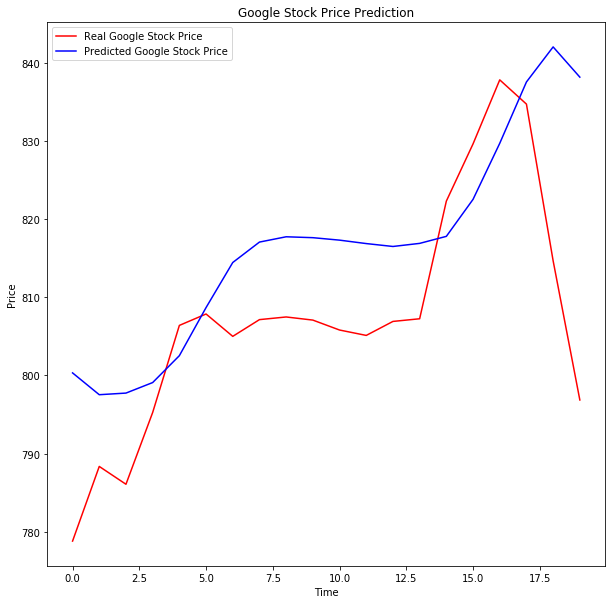

In [77]:
#Visualize RNN
plt.figure(figsize=(10,10))
plt.plot(real_stock_price,color='red',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()